In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
#Average probs for 0 and 1 for each doc
probs = pickle.load(open('probs.p','rb'))

In [4]:
test1 = pickle.load(open('test1.p','rb'))

In [5]:
docs = pickle.load(open('docs.p','rb'))

In [6]:
models = pickle.load(open('models.p','rb'))

In [7]:
predictions = pickle.load(open('predictions.p', 'rb'))

In [8]:
probssentences = pickle.load(open('probssentences.p', 'rb'))

In [9]:
predsmaxdiff = pickle.load(open('predsmaxdiff.p','rb'))

In [6]:
print test1[0:2]
print probs[0:2]

            id  sentiment                                             review
2618  "3947_2"          0  "In the Comic, Modesty is strong. Alexandra St...
7678  "9617_2"          0  "Three years ago, Rachel(Therese Fretwell) was...
            0         1
doc                    
0    0.778645  0.221355
1    0.596161  0.403839


In [9]:
#append the true class value
probs["truelabel"] = 0
for i in range(len(probs)):
    probs.set_value(i, 'truelabel', test1.iloc[[i]]["sentiment"])

In [6]:
print probs[0:10]
print test1[0:10]

            0         1  truelabel
doc                               
0    0.778645  0.221355          0
1    0.596161  0.403839          0
2    0.997966  0.002034          0
3    0.115667  0.884333          1
4     0.42853   0.57147          0
5    0.613087  0.386913          1
6    0.629082  0.370918          0
7    0.172593  0.827407          1
8    0.693213  0.306787          0
9     0.12056   0.87944          1
              id  sentiment                                             review
2618    "3947_2"          0  "In the Comic, Modesty is strong. Alexandra St...
7678    "9617_2"          0  "Three years ago, Rachel(Therese Fretwell) was...
9140   "11090_1"          0  "This movie looks like it was made for TV . Fo...
6448   "5119_10"          1  "I just have to say, this is one of my favorit...
21103   "4224_4"          0  "STAR RATING: ***** The Works **** Just Misses...
5048    "6298_9"          1  "Great fun. I went with 8 friends to a sneak p...
21537   "4662_4"          0

In [44]:
#Get two sets of positive reviews and negative reviews and their probabilities
probspos = probs.loc[probs["truelabel"] == 1]
probsneg = probs.loc[probs["truelabel"] == 0]
print probspos[0:10]
print probsneg[0:10]

               0         1  truelabel
doc                                  
3       0.115667  0.884333          1
5       0.613087  0.386913          1
7       0.172593  0.827407          1
9        0.12056   0.87944          1
10      0.286745  0.713255          1
11      0.140428  0.859572          1
13      0.635398  0.364602          1
14   1.08962e-40         1          1
17     0.0338101   0.96619          1
18      0.274075  0.725925          1
            0         1  truelabel
doc                               
0    0.778645  0.221355          0
1    0.596161  0.403839          0
2    0.997966  0.002034          0
4     0.42853   0.57147          0
6    0.629082  0.370918          0
8    0.693213  0.306787          0
12   0.734745  0.265255          0
15   0.688095  0.311905          0
16   0.892192  0.107808          0
20   0.324809  0.675191          0


In [45]:
#subset to the only column being that of the probabilities for each class
probspos = probspos[[1]]
probsneg = probsneg[[0]]
print probspos[0:10]
print probsneg[0:10]

            1
doc          
3    0.884333
5    0.386913
7    0.827407
9     0.87944
10   0.713255
11   0.859572
13   0.364602
14          1
17    0.96619
18   0.725925
            0
doc          
0    0.778645
1    0.596161
2    0.997966
4     0.42853
6    0.629082
8    0.693213
12   0.734745
15   0.688095
16   0.892192
20   0.324809


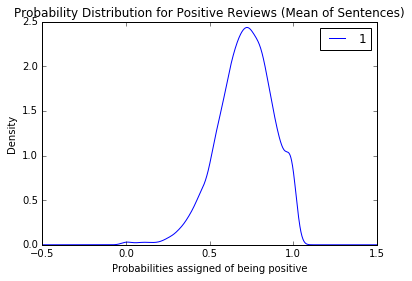

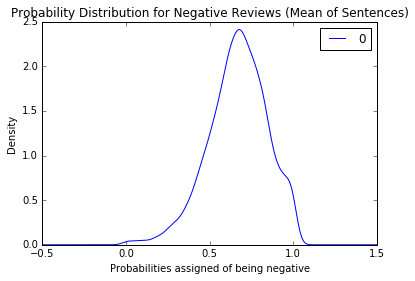

In [46]:
%matplotlib inline

pltpos = probspos.plot(kind='density', title='Probability Distribution for Positive Reviews (Mean of Sentences)')
pltpos.set(xlabel="Probabilities assigned of being positive")
pltneg = probsneg.plot(kind='density', title='Probability Distribution for Negative Reviews (Mean of Sentences)')
pltneg.set(xlabel="Probabilities assigned of being negative")

## Now sentence distribution!

Will take all sentences with positive labels and plot distribution of positive probabilities on sentences.
Vice versa for negative label sentences.

In [29]:
print probssentences[34:81]
print probs[0:11]

              0           1 doc  truelabel
34     0.001471    0.998529   5          1
35     0.755196    0.244804   5          1
36     0.625756    0.374244   5          1
37     0.963491   0.0365093   5          1
38     0.504761    0.495239   5          1
39     0.999376  0.00062437   5          1
40     0.856354    0.143646   5          1
41    0.0173219    0.982678   5          1
42   0.00412954     0.99587   5          1
43      0.70238     0.29762   5          1
44     0.941276   0.0587245   5          1
45     0.985531   0.0144694   5          1
46     0.946825   0.0531755   6          0
47     0.216566    0.783434   6          0
48     0.991008  0.00899209   6          0
49      0.30935     0.69065   6          0
50      0.99255   0.0074498   6          0
51      0.94651   0.0534898   6          0
52   0.00076265    0.999237   6          0
53     0.436986    0.563014   7          1
54    0.0227483    0.977252   7          1
55    0.0580431    0.941957   7          1
56     0.25

In [10]:
#append the true class value
probssentences["truelabel"] = 0
for i in range(len(probssentences)):
    #get true label value from test1 where index matches doc number
    j = probssentences.iloc[i]['doc']
    probssentences.set_value(i, 'truelabel', test1.iloc[[j]]["sentiment"])

In [40]:
#Get two sets of positive reviews and negative reviews and their probabilities
probspossent = probssentences.loc[probssentences["truelabel"] == 1]
probsnegsent = probssentences.loc[probssentences["truelabel"] == 0]
print probspossent[0:20]
print probsnegsent[0:20]

             0           1 doc  truelabel
20  0.00024637    0.999754   3          1
21    0.423696    0.576304   3          1
22  0.00361574    0.996384   3          1
23  0.00025915    0.999741   3          1
24     0.25365     0.74635   3          1
25   0.0125362    0.987464   3          1
34    0.001471    0.998529   5          1
35    0.755196    0.244804   5          1
36    0.625756    0.374244   5          1
37    0.963491   0.0365093   5          1
38    0.504761    0.495239   5          1
39    0.999376  0.00062437   5          1
40    0.856354    0.143646   5          1
41   0.0173219    0.982678   5          1
42  0.00412954     0.99587   5          1
43     0.70238     0.29762   5          1
44    0.941276   0.0587245   5          1
45    0.985531   0.0144694   5          1
53    0.436986    0.563014   7          1
54   0.0227483    0.977252   7          1
            0            1 doc  truelabel
0   0.0885551     0.911445   0          0
1    0.731149     0.268851   0    

In [41]:
#subset to the only column being that of the probabilities for each class
probspossentpos = probspossent[[1]]
probsnegsentneg = probsnegsent[[0]]

probsnegsentpos = probspossent[[0]]
probspossentneg = probsnegsent[[1]]

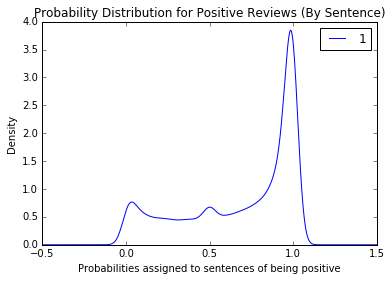

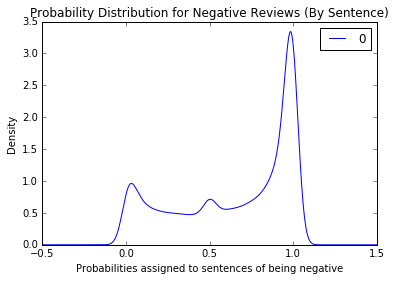

In [39]:
%matplotlib inline

pltpossentpos = probspossentpos.plot(kind='density', title='Probability Distribution for Positive Reviews (By Sentence)')
pltpossentpos.set(xlabel="Probabilities assigned to sentences of being positive")
pltnegsentneg = probsnegsentneg.plot(kind='density', title='Probability Distribution for Negative Reviews (By Sentence)')
pltnegsentneg.set(xlabel="Probabilities assigned to sentences of being negative")

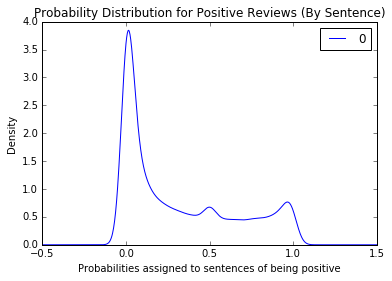

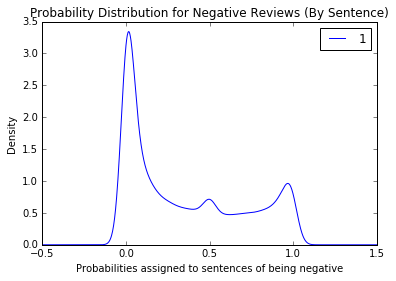

In [42]:
%matplotlib inline

pltnegsentpos = probsnegsentpos.plot(kind='density', title='Probability Distribution for Positive Reviews (By Sentence)')
pltnegsentpos.set(xlabel="Probabilities assigned to sentences of being positive")
pltpossentneg = probspossentneg.plot(kind='density', title='Probability Distribution for Negative Reviews (By Sentence)')
pltpossentneg.set(xlabel="Probabilities assigned to sentences of being negative")

## Distributions of single reviews now. Correct vs incorrectly classified.

In [12]:
#to determine which docs to use
print predsmaxdiff[0:10]
print test1[0:10]["sentiment"]
print predictions[0:10]

[ 1.  1.  1.  0.  1.  1.  0.  1.  0.  1.]
22361    0
1129     1
4335     0
1874     0
5660     1
13332    1
13355    1
2990     1
2885     0
6126     1
Name: sentiment, dtype: int64
[ 1.  1.  0.  0.  1.  1.  0.  1.  0.  1.]


[0.0, 1.0, 0.0, 4.0]

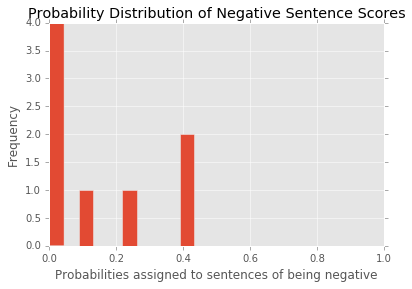

In [13]:
# correctly classified as positive by both methods
probsdoc = probssentences[probssentences["doc"] == 9]
probsneg = probsdoc[[0]]

%matplotlib inline

pltneg = plt.hist(probsneg)
plt.title('Probability Distribution of Negative Sentence Scores')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0, 0.0, 4.0])

#pltneg = probsneg.plot(kind = 'density', title='Probability Distribution of Negative Sentence Scores')
#pltneg.set(xlabel="Probabilities assigned to sentences of being negative")
#pltneg.axis([0.0,1.0,0.0,1.0])

[0.0, 1.0, 0.0, 4.0]

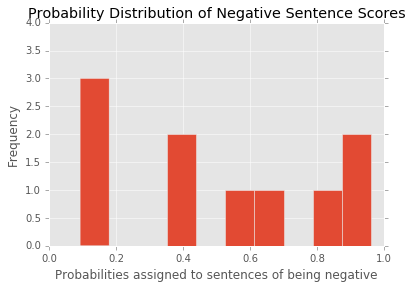

In [239]:
# misclassified negative for both
probsdoc = probssentences.loc[probssentences["doc"] == 6]
probsneg = probsdoc[[0]]

%matplotlib inline

pltneg = plt.hist(probsneg)
plt.title('Probability Distribution of Negative Sentence Scores')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0, 0.0, 4.0])

#pltnegdensity = probsneg.plot(kind='density', title='Probability Distribution of Negative Sentence Scores')
#pltnegdensity.set(xlabel="Probabilities assigned to sentences of being negative")
#pltneg.axis([0.0,1.0,0.0,2.5])

[0.0, 1.0, 0.0, 4.0]

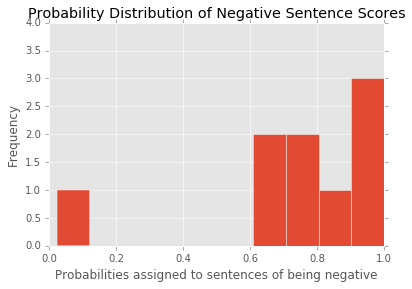

In [227]:
# correctly classified negative by both
probsdoc = probssentences.loc[probssentences["doc"] == 8]
probsneg = probsdoc[[0]]

%matplotlib inline

pltneg = plt.hist(probsneg)
plt.title('Probability Distribution of Negative Sentence Scores')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0, 0.0, 4.0])

#pltneg = probsneg.plot(kind='density', title='Probability Distribution of Negative Sentence Scores')
#pltneg.set(xlabel="Probabilities assigned to sentences of being negative")
#pltneg.axis([0.0,1.0,0.0,2.5])

[0.0, 1.0, 0.0, 4.0]

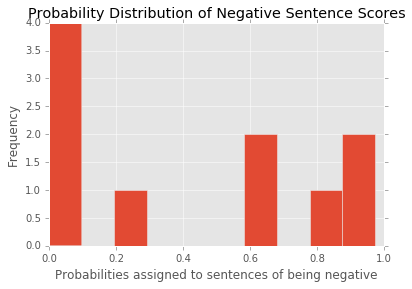

In [228]:
# misclassified positive by both
probsdoc = probssentences.loc[probssentences["doc"] == 0]
probsneg = probsdoc[[0]]
probspos = probsdoc[[1]]

%matplotlib inline

pltneg = plt.hist(probsneg)
plt.title('Probability Distribution of Negative Sentence Scores')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0, 0.0, 4.0])

#pltneg = probsneg.plot(kind='density', title='Probability Distribution of Negative Sentence Scores')
#pltneg.set(xlabel="Probabilities assigned to sentences of being negative")
#pltneg.axis([0.0,1.0,0.0,1.6])

## Misclassified reviews for average vs. maxProb method

In [230]:
#probssentences is the variable holding our sentence scores
#predsmaxdiff holds our predictions for the actual values (maxdiff method)
#predictions holds our predictions for the actual values (average method)

In [243]:
#Make sure test1 is still in the same order of docs as the prediction arrays
print np.size(np.where(predsmaxdiff == test1["sentiment"]))*1./np.size(predsmaxdiff)
print np.size(np.where(predictions == test1["sentiment"]))*1./np.size(predictions)

0.85496
0.87376


In [103]:
#make sure "truelabel" has been appended to probssentences

In [22]:
#add columns for the predictions from both models
probssentences["maxprobPred"] = 0
probssentences["meanPred"] = 0

In [32]:
for i in range(len(probssentences)):
    #get prediction values by using doc value as index to predictions arrays
    j = probssentences.iloc[i]['doc']
    probssentences.set_value(i, 'maxprobPred', predsmaxdiff[j])
    probssentences.set_value(i, 'meanPred', predictions[j])

[0.0, 1.0, 0.0, 3000.0]

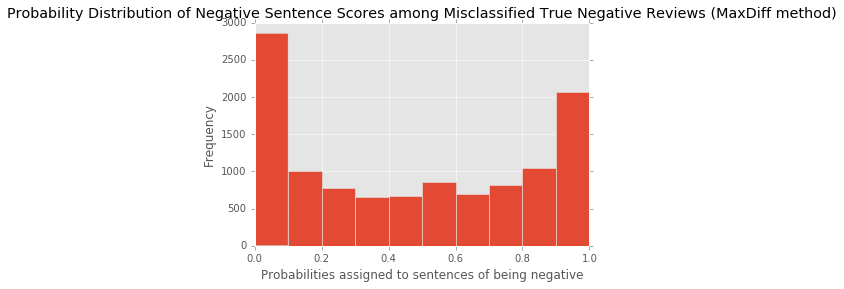

In [101]:
probssentencesneg = probssentences.loc[probssentences['maxprobPred'] == 1]
#now get those for each model only where misclassified
maxdiffmisclass = probssentencesneg.loc[probssentencesneg['truelabel'] != probssentencesneg['maxprobPred']]
#subset to the only column being that of the probabilities for each class
probsmaxdiff = maxdiffmisclass[[0]]

%matplotlib inline

pltmaxdiff = plt.hist(probsmaxdiff)
plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (MaxDiff method)')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,3000.0])

[0.0, 1.0, 0.0, 3000.0]

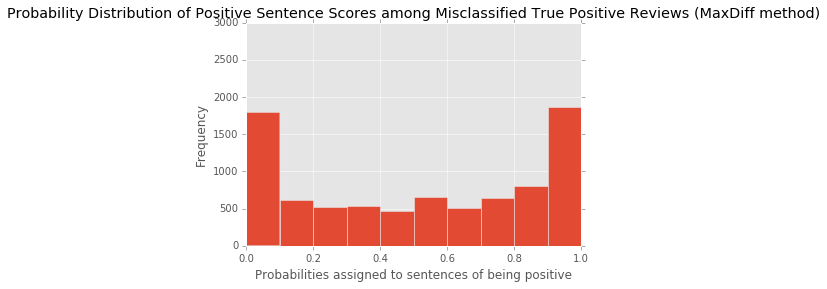

In [100]:
probssentencespos = probssentences.loc[probssentences['maxprobPred'] == 0]
maxdiffmisclass = probssentencespos.loc[probssentencespos['truelabel'] != probssentencespos['maxprobPred']]
probsmaxdiff = maxdiffmisclass[[1]]

%matplotlib inline

pltmaxdiff = plt.hist(probsmaxdiff)
plt.title('Probability Distribution of Positive Sentence Scores among Misclassified True Positive Reviews (MaxDiff method)')
plt.xlabel("Probabilities assigned to sentences of being positive")
plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,3000.0])

[0.0, 1.0, 0.0, 3000.0]

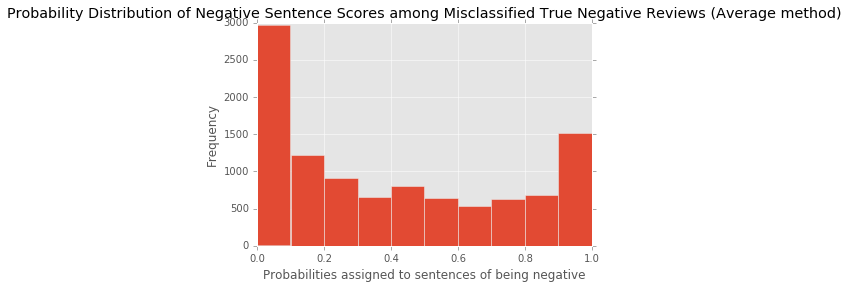

In [98]:
probssentencespos = probssentences.loc[probssentences['meanPred'] == 1]
meanmisclass = probssentencespos.loc[probssentencespos['truelabel'] != probssentencespos['meanPred']]
probsmean = meanmisclass[[0]]

%matplotlib inline

pltmaxdiff = plt.hist(probsmean)
plt.title('Probability Distribution of Negative Sentence Scores among Misclassified True Negative Reviews (Average method)')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,3000.0])

[0.0, 1.0, 0.0, 3000.0]

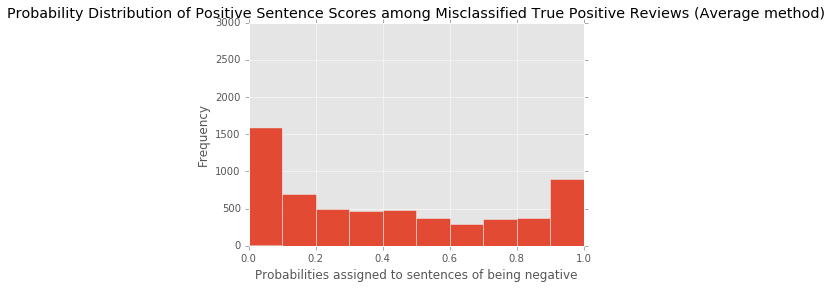

In [99]:
probssentencesneg = probssentences.loc[probssentences['meanPred'] == 0]
meanmisclass = probssentencesneg.loc[probssentencesneg['truelabel'] != probssentencesneg['meanPred']]
probsmean = meanmisclass[[1]]

%matplotlib inline

pltmaxdiff = plt.hist(probsmean)
plt.title('Probability Distribution of Positive Sentence Scores among Misclassified True Positive Reviews (Average method)')
plt.xlabel("Probabilities assigned to sentences of being negative")
plt.ylabel("Frequency")
plt.axis([0.0,1.0,0.0,3000.0])

## Sentence Scoring Effort

In [3]:
predsscoresentences = pickle.load(open('predsscoressentences.p','rb'))